In [36]:
#import libraries 

from textblob import TextBlob
import pandas as pd
import numpy as np
import tweepy
import re
import pprint
import matplotlib.pyplot as plt 
import csv


In [37]:
#Authentication via API app

auth = tweepy.OAuthHandler('w1z4mskpHBbRYIuzQOoGtzQan', 'GkxjpNVpvuQWAm8pCwuLYovGwSfq1zItL2PtjZTIY1mYvqOJxQ')
auth.set_access_token('208155192-7ShX8v9AuvT0GqsBpHMQaNrPsyC3TuZdPH1nA6C9',
                              'Z279T5RxOakDbvsKD5acs4vPOLIHu9MDX1e7dfoHolD6t')
api = tweepy.API(auth)


In [38]:
#get request for 2000 tweets related to elden ring 
search_term = 'Elden Ring AND elden ring'

tweet_amount = 2000

tweets = tweepy.Cursor(api.search_tweets, q=search_term, lang='en').items(tweet_amount)

sum_tweets = [tweet.text for tweet in tweets]

In [39]:
#create a df to store the tweets with column called "tweets"
df = pd.DataFrame(sum_tweets, columns=['Tweets'])

#display first 10 tweets 

df.head(10)
                 

,Tweets
0,RT @Punisherx6: Im live with some more Elden R...
1,@OfficialSlickYT Lol after Elden Ring
2,RT @IronPineapple_: Calling it now: the DLC fo...
3,@awildjessichu You had an advantage over me! L...
4,my elden ring rune insecurity did not adjust w...
5,"RT @GameSpot: Welcome to the list, Elden Ring!..."
6,RT @Namatnieks: What if Elden Ring was a 2d pi...
7,RT @KamiSulit: Champion\n\nThe Calamity Knight...
8,RT @Namatnieks: What if Elden Ring was a 2d pi...
9,RT @Namatnieks: What if Elden Ring was a 2d pi...


In [40]:
#clean the tweets to get "pure" text 

def clean_tweets(tweet):
    tweet = re.sub('RT', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub('#[A-Za-z0-9]+', '', tweet)
    tweet = re.sub('\\n', '', tweet)
    tweet = re.sub('@[A-Za-z0-9]+:', '', tweet)
    return tweet




In [41]:
#apply clean function 

df['Clean_Tweets'] = df['Tweets'].apply(clean_tweets)

#display the diffrences 

df.head()
            


,Tweets,Clean_Tweets
0,RT @Punisherx6: Im live with some more Elden R...,Im live with some more Elden Ring! Testing o...
1,@OfficialSlickYT Lol after Elden Ring,@OfficialSlickYT Lol after Elden Ring
2,RT @IronPineapple_: Calling it now: the DLC fo...,@IronPineapple_: Calling it now: the DLC for ...
3,@awildjessichu You had an advantage over me! L...,@awildjessichu You had an advantage over me! L...
4,my elden ring rune insecurity did not adjust w...,my elden ring rune insecurity did not adjust w...


In [42]:
# analysis using textblob 

#polarity 
def get_polarity(tweet):
    return TextBlob(tweet).polarity

#subjectivity 
def get_subject(tweet):
    return TextBlob(tweet).subjectivity

In [43]:
#add the above parameters to df: 

df['Polarity'] = df['Clean_Tweets'].apply(get_polarity)
df['Subjectivity'] = df['Clean_Tweets'].apply(get_subject)

#display data

df.head()

,Tweets,Clean_Tweets,Polarity,Subjectivity
0,RT @Punisherx6: Im live with some more Elden R...,Im live with some more Elden Ring! Testing o...,0.380682,0.500000
1,@OfficialSlickYT Lol after Elden Ring,@OfficialSlickYT Lol after Elden Ring,0.800000,0.700000
2,RT @IronPineapple_: Calling it now: the DLC fo...,@IronPineapple_: Calling it now: the DLC for ...,0.000000,0.000000
3,@awildjessichu You had an advantage over me! L...,@awildjessichu You had an advantage over me! L...,0.254167,0.620833
4,my elden ring rune insecurity did not adjust w...,my elden ring rune insecurity did not adjust w...,0.500000,0.500000


In [44]:
#assign descriptive text to the polarity result

def assign_sentiment(polarity):
    
    if polarity > 0.00:
        return 'Postive'  
    elif polarity < 0.00:
        return 'Negative'
    elif polarity == 0.000000:
        return 'Neutral'
    
#Display the new column

df['Sentiment'] = df['Polarity'].apply(assign_sentiment)

df.head()
    

,Tweets,Clean_Tweets,Polarity,Subjectivity,Sentiment
0,RT @Punisherx6: Im live with some more Elden R...,Im live with some more Elden Ring! Testing o...,0.380682,0.500000,Postive
1,@OfficialSlickYT Lol after Elden Ring,@OfficialSlickYT Lol after Elden Ring,0.800000,0.700000,Postive
2,RT @IronPineapple_: Calling it now: the DLC fo...,@IronPineapple_: Calling it now: the DLC for ...,0.000000,0.000000,Neutral
3,@awildjessichu You had an advantage over me! L...,@awildjessichu You had an advantage over me! L...,0.254167,0.620833,Postive
4,my elden ring rune insecurity did not adjust w...,my elden ring rune insecurity did not adjust w...,0.500000,0.500000,Postive


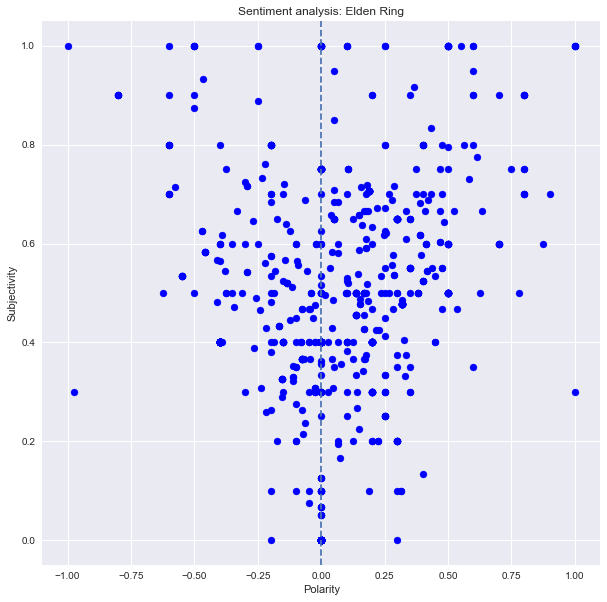

In [45]:
#plotting the data subjectivity of the tweets vs Polarity 
# create figure and assign size: 
plt.figure(figsize=(10,10))

#plot each point

for i in range (0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")

plt.style.use('seaborn')
plt.axvline(0, ls='--')
plt.title('Sentiment analysis: Elden Ring')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


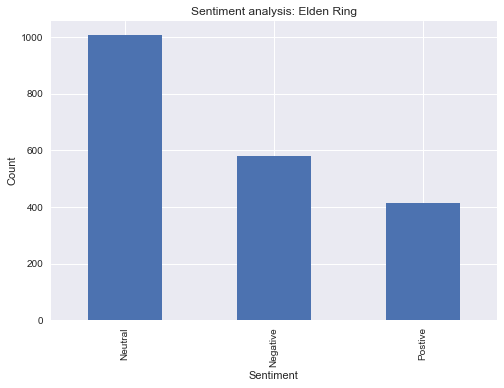

In [46]:
#display tweet count of Pos, Neg, and neutral tweets 

df['Sentiment'].value_counts().plot(kind = 'bar')
plt.title('Sentiment analysis: Elden Ring')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [47]:
#save data to csv file 

with open('data_set_postlaunch',mode = 'a') as csvfile:
    
    df.to_csv('data_set_1mpostlaunch.csv', mode='a', header = False)